In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
amazon_df=pd.read_csv('amazon_reviews.csv')
amazon_df
dummy=amazon_df.copy()

# EDA

<AxesSubplot: >

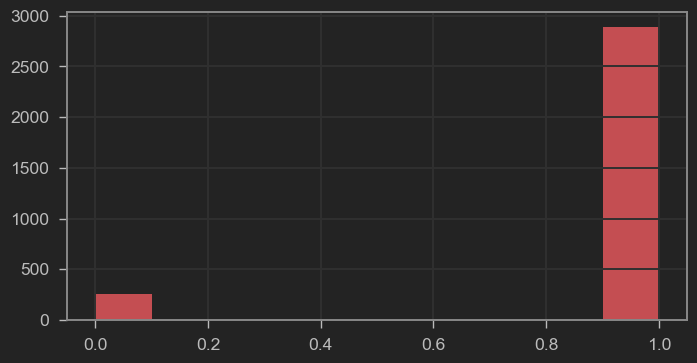

In [3]:
amazon_df['feedback'].hist(bins=10,figsize=(8,4),color='r')

<AxesSubplot: >

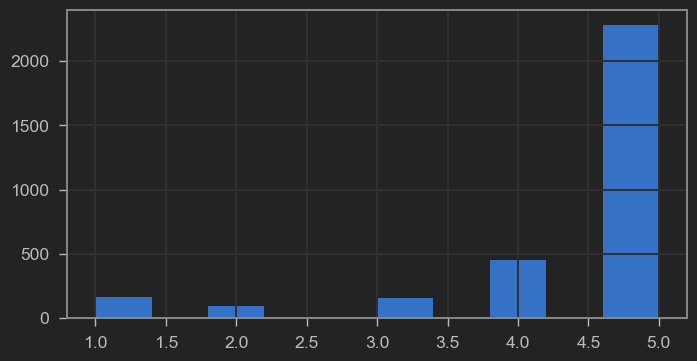

In [4]:
amazon_df['rating'].hist(bins=10,figsize=(8,4),color='b')

<AxesSubplot: >

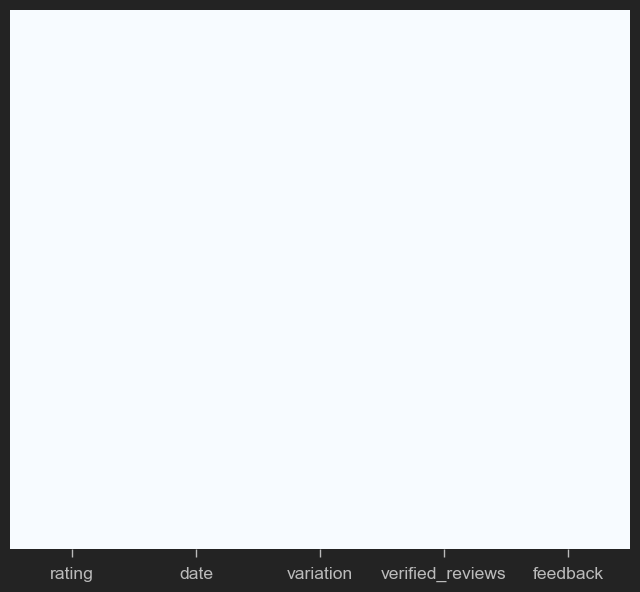

In [5]:
sns.heatmap(amazon_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [6]:
amazon_df.shape

(3150, 5)

In [7]:
amazon_df['length']=amazon_df['verified_reviews'].apply(len)
amazon_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in between!!",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.",1,441
3148,5,30-Jul-18,White Dot,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.",1,380


In [8]:
amazon_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [9]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   length            3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


# Length of reviews equal to the Mean

In [10]:
mean_length=amazon_df[amazon_df['length']==1]['verified_reviews']
mean_length=pd.DataFrame(mean_length)
mean_length.shape

(81, 1)

In [11]:
amazon_df[amazon_df['length']==11]['verified_reviews'].iloc[0]

'looks great'

<AxesSubplot: ylabel='Frequency'>

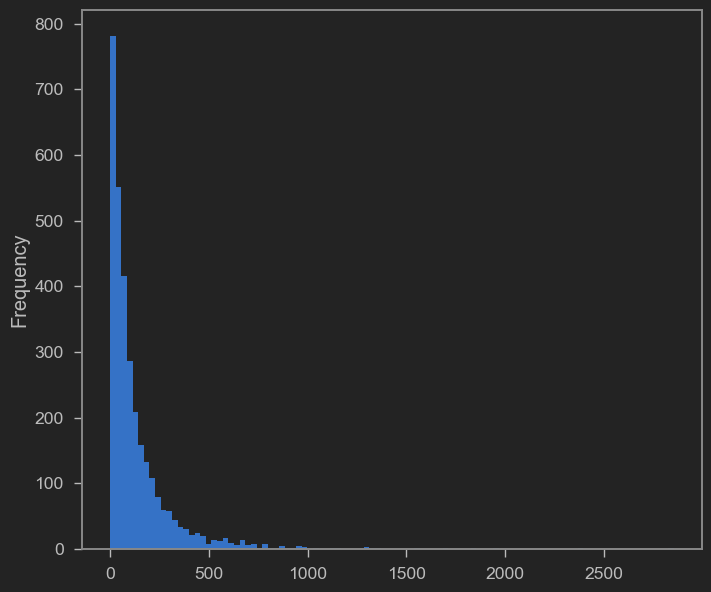

In [12]:
amazon_df['length'].plot(bins=100,kind='hist')

# WordCloud

In [13]:
amazon_df=amazon_df.drop('date',axis=1)

In [14]:
def wordcloud(a):
    positive=a[a['feedback']==1]
    negative=a[a['feedback']==0] 
    t_p=positive['verified_reviews'].tolist()
    t_j1=''.join(t_p)
    t_j1
    t_n=negative['verified_reviews'].tolist()
    t_j2=''.join(t_n)
    t_j2
    from wordcloud import WordCloud
    plt.figure(figsize=(20,20))
    plt.imshow(WordCloud().generate(t_j1))
    plt.figure(figsize=(20,20))
    plt.imshow(WordCloud().generate(t_j2))

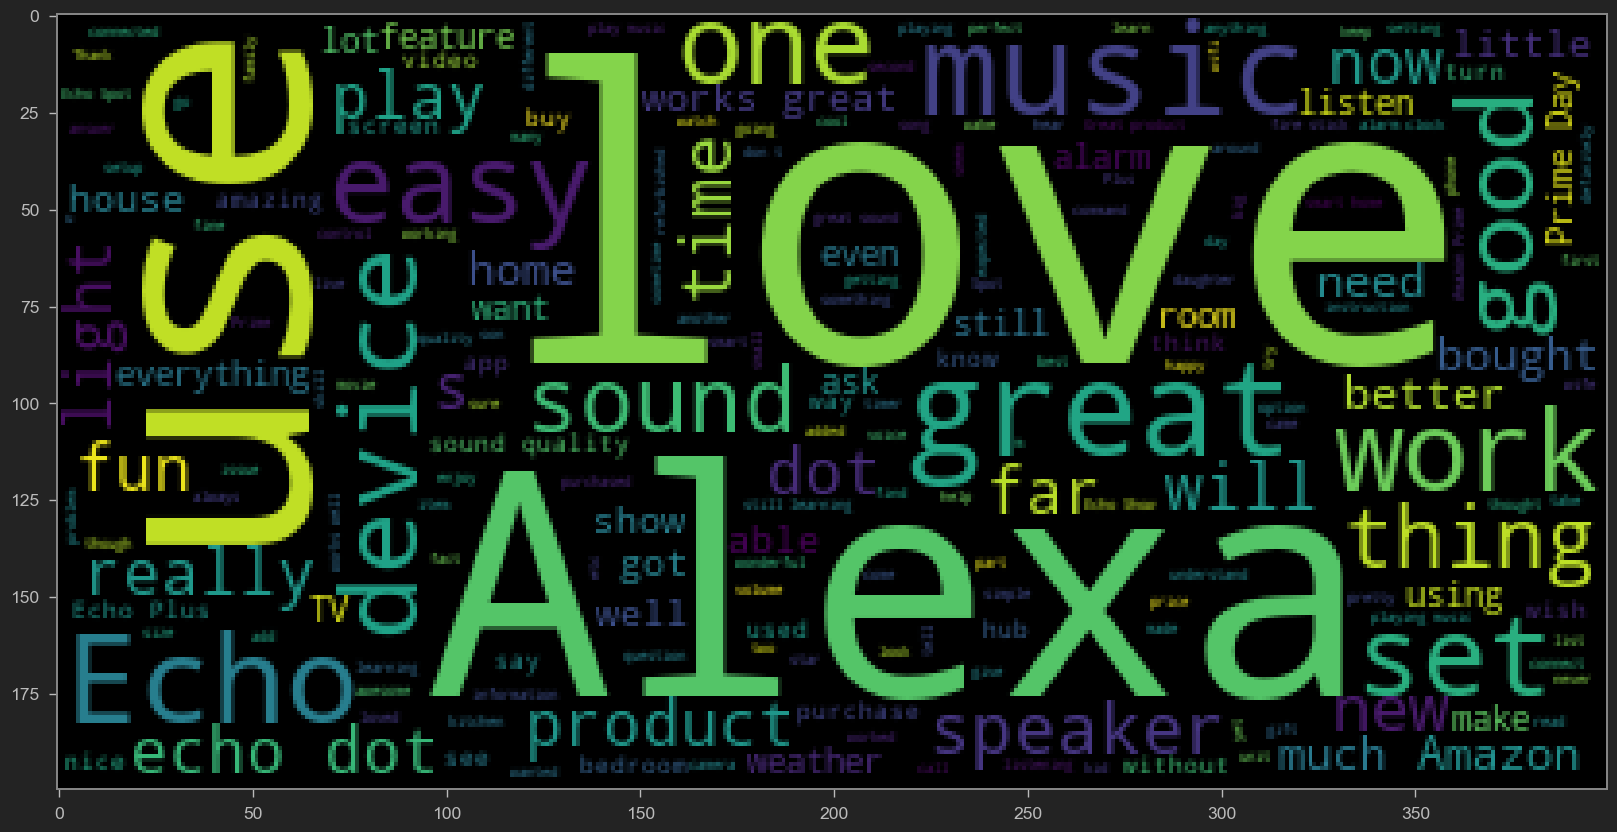

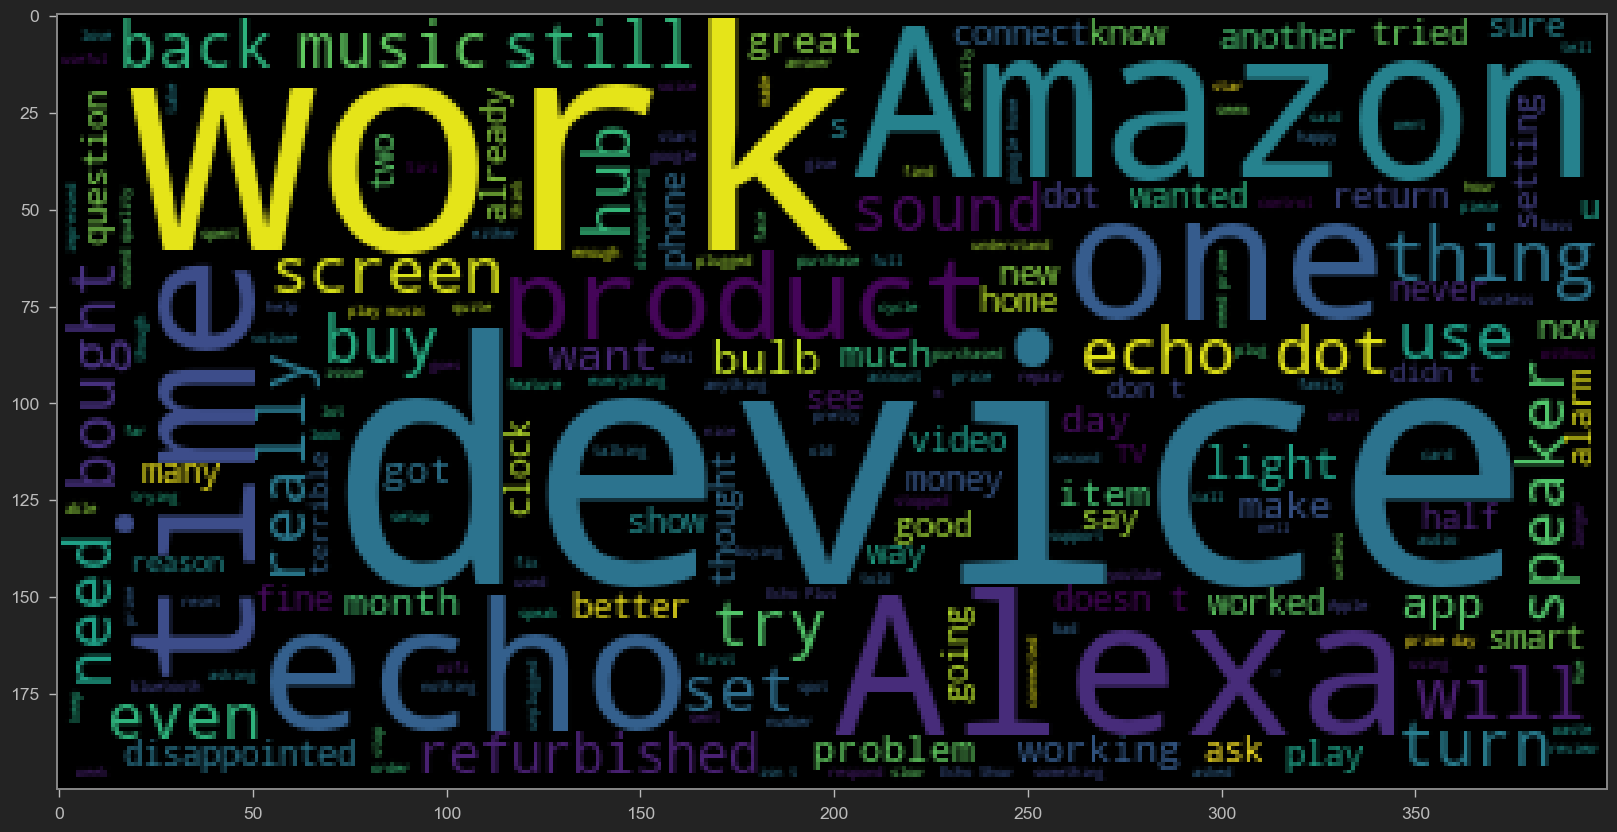

In [15]:
wordcloud(amazon_df)

# Data Cleaning!

In [16]:
amazon_df=amazon_df.drop(['rating','variation'],axis=1)

In [17]:
amazon_df

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,Music,1,5
...,...,...,...
3145,"Perfect for kids, adults and everyone in between!!",1,50
3146,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up.",1,135
3147,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.",1,441
3148,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers.",1,380


# Removing punctuations, Stopwords 

In [18]:
import string
string.punctuation

import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [20]:
amazon_df_clean=amazon_df['verified_reviews'].apply(message_cleaning)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [22]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(amazon_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
amazon_countvectorizer.shape
x=pd.DataFrame(amazon_countvectorizer.toarray())
x

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y=amazon_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# Using Naive Base Classifier as a model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
def NBclassifier(X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)
    NB_classifier=MultinomialNB()
    NB_classifier.fit(X_train,Y_train)
    Y_predict_test = NB_classifier.predict(X_test)
    cm = confusion_matrix(Y_test, Y_predict_test)
    hm=sns.heatmap(cm, annot=True)
    cr=print(classification_report(Y_test, Y_predict_test))
    return hm,cr

              precision    recall  f1-score   support

           0       0.61      0.30      0.40        57
           1       0.93      0.98      0.96       573

    accuracy                           0.92       630
   macro avg       0.77      0.64      0.68       630
weighted avg       0.90      0.92      0.91       630



(<AxesSubplot: >, None)

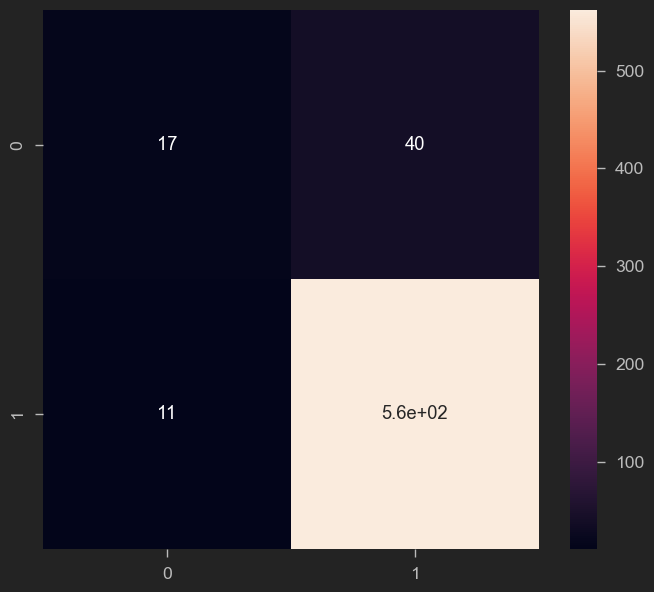

In [28]:
NBclassifier(x,y)